# Libraries

In [1]:
import volpick.data
import volpick
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import time
import datetime
from pathlib import Path
from obspy import read
from collections import namedtuple
from volpick.data.utils import freqency_index
import seisbench.data as sbd
from volpick.data.utils import extract_events, exclude_close_events

ImportError: cannot import name 'exclude_close_events' from 'volpick.data.utils' (/home/zhongyiyuan/volpick/volpick/data/utils.py)

In [2]:
volpick.cache_root

PosixPath('/home/zhongyiyuan/DATA/my_data')

# 1 Initialization and loading tables

In [2]:
alsk = volpick.data.AlaskaDataset()

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/Alaska
/home/zhongyiyuan/DATA/my_data/Alaska exists


## Whole catalog (events and arrival times at associtated stations) 所有的事件和对应的台站到时

In [3]:
whole_catalog = alsk.read(format="csv")
print(f"The whole catalog includes {len(whole_catalog)} waveforms, where there are")
print(
    f""" {len(whole_catalog[whole_catalog["source_type"]!="lp"])} waveforms for regular earthquakes"""
)
print(
    f""" {len(whole_catalog[whole_catalog["source_type"]=="lp"])} waveforms for long-period earthquakes"""
)

The whole catalog includes 882415 waveforms, where there are
 785281 waveforms for regular earthquakes
 97134 waveforms for long-period earthquakes


In [4]:
all_events = extract_events(whole_catalog)
print(f"{len(all_events)}")

121193


In [48]:
all_events[all_events["source_id"] == "alk61763573"]["source_type"].iloc[0] == "lp"

True

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type
780,alk60836243,1990-01-04T00:22:04.940000Z,60.227500,-153.286167,56.88,1.40,ml,lp
832,alk60836808,1990-01-08T14:21:35.530000Z,60.461667,-152.803333,11.06,0.20,ml,lp
889,alk60837383,1990-01-12T10:19:07.660000Z,60.282500,-152.815333,15.92,0.70,ml,lp
1491,alk60842628,1990-02-15T23:51:20.710000Z,60.485500,-152.816333,10.68,0.60,ml,lp
1722,alk60844098,1990-03-01T08:16:11.070000Z,60.468000,-152.799833,13.19,0.20,ml,lp
...,...,...,...,...,...,...,...,...
121066,alk65058567,2017-12-16T19:58:30.860000Z,54.086833,-165.995500,16.79,1.14,ml,lp
121071,alk65058747,2017-12-17T04:51:25.860000Z,51.778833,-178.781500,14.97,0.57,ml,lp
121094,alk65059432,2017-12-19T14:18:18.630000Z,52.038833,-176.101333,27.07,0.51,ml,lp
121119,alk65060142,2017-12-21T07:59:46.370000Z,51.834333,-178.850500,12.12,0.63,ml,lp


In [24]:
west = -(164 + 19 / 60)
east = -(163 + 31 / 60)
south = 54 + 31 / 60
north = 54 + 59 / 60

In [23]:
print(west, east, south, north)

-164.31666666666666 -163.51666666666668 54.516666666666666 54.983333333333334


In [6]:
# west = -164.37485
# east = -163.46467
# south = 54.63607
# north = 54.90488

In [18]:
np.unique(whole_catalog["source_type"])

array(['av', 'le', 'lp', 'ot', 're', 'tr'], dtype=object)

In [56]:
x = all_events[all_events["source_id"] == "alk61763573"]
x

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type
21560,alk61763573,1999-05-29T02:58:19.820000Z,54.721667,-164.008,14.56,1.7,ml,lp


In [64]:
(
    (x["source_latitude_deg"] < north)
    & (x["source_latitude_deg"] > south)
    & (x["source_longitude_deg"] > west)
    # & (x["source_longitude_deg"] > east)
    & (x["source_origin_time"] <= "2002-12-31T23:59:00.000000Z")
    & (x["source_origin_time"] >= "1998-01-01T00:00:00.000000Z")
    & (x["source_type"] == "lp")
)

21560    True
dtype: bool

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type
17062,alk61730433,1997-10-24T06:16:56.750000Z,54.739000,-163.645500,35.69,1.2,ml,lp
17607,alk61735213,1998-01-24T00:04:53.000000Z,54.730000,-163.929333,34.80,1.8,ml,lp
18785,alk61743393,1998-07-05T23:49:17.110000Z,54.745000,-164.167667,11.27,1.1,ml,lp
18787,alk61743408,1998-07-06T04:33:37.560000Z,54.701000,-164.184000,11.76,1.0,ml,lp
18851,alk61743833,1998-07-13T05:47:48.920000Z,54.790333,-164.152667,11.17,1.1,ml,lp
18867,alk61743948,1998-07-14T21:11:52.120000Z,54.777500,-164.140500,14.62,1.2,ml,lp
18893,alk61744188,1998-07-17T01:28:28.810000Z,54.761500,-164.107167,13.67,1.2,ml,lp
18894,alk61744198,1998-07-17T04:00:16.150000Z,54.752333,-163.567667,28.87,1.8,ml,lp
18895,alk61744203,1998-07-17T04:02:12.470000Z,54.784000,-163.525500,30.01,1.1,ml,lp
18896,alk61744208,1998-07-17T04:03:21.050000Z,54.902000,-164.024167,37.13,1.6,ml,lp


In [75]:
west = -(164 + 19 / 60)
east = -(163 + 31 / 60)
south = 54 + 31 / 60
north = 54 + 59 / 60

all_events[
    (all_events["source_latitude_deg"] < north)
    & (all_events["source_latitude_deg"] > south)
    & (all_events["source_longitude_deg"] > west)
    & (all_events["source_longitude_deg"] < east)
    & (all_events["source_origin_time"] <= "2002-12-31T23:59:59.000000Z")
    & (all_events["source_origin_time"] >= "1997-01-01T00:00:00.000000Z")
    & (all_events["source_type"] == "lp")
    & (all_events["source_depth_km"] >= 10)
].to_csv("shshdn_dlp_1997_2002.csv", index=False)

all_events[
    (all_events["source_latitude_deg"] < north)
    & (all_events["source_latitude_deg"] > south)
    & (all_events["source_longitude_deg"] > west)
    & (all_events["source_longitude_deg"] < east)
    & (all_events["source_origin_time"] <= "2002-12-31T23:59:59.000000Z")
    & (all_events["source_origin_time"] >= "1997-01-01T00:00:00.000000Z")
    & (all_events["source_type"] == "lp")
    & (all_events["source_depth_km"] < 10)
].to_csv("shshdn_shallow_lp_1997_2002.csv", index=False)

In [79]:
shishaldin_1999 = whole_catalog[
    (whole_catalog["source_latitude_deg"] < north)
    & (whole_catalog["source_latitude_deg"] > south)
    & (whole_catalog["source_longitude_deg"] > west)
    & (whole_catalog["source_longitude_deg"] < east)
    & (whole_catalog["source_origin_time"] <= "2002-12-31T23:59:59.000000Z")
    & (whole_catalog["source_origin_time"] >= "1997-01-01T00:00:00.000000Z")
    & (whole_catalog["source_type"] == "lp")
    & (whole_catalog["source_depth_km"] < 10)
]

In [80]:
shishaldin_1999

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,station_location_code,trace_channel,trace_p_arrival_time,trace_s_arrival_time,trace_p_max_weight,trace_s_max_weight,trace_p_first_motion
119848,alk61743428,1998-07-06T10:13:12.870000Z,54.746167,-164.147167,1.73,1.1,ml,lp,AV,ISNN,--,EH,1998-07-06T10:13:17.550000Z,1998-07-06T10:13:22.330000Z,0.83,1.25,NaN
119849,alk61743428,1998-07-06T10:13:12.870000Z,54.746167,-164.147167,1.73,1.1,ml,lp,AV,ISTK,--,EH,1998-07-06T10:13:18.140000Z,1998-07-06T10:13:22.420000Z,0.83,1.25,NaN
119850,alk61743428,1998-07-06T10:13:12.870000Z,54.746167,-164.147167,1.73,1.1,ml,lp,AV,SSLN,--,EH,1998-07-06T10:13:15.740000Z,1998-07-06T10:13:17.340000Z,0.42,0.83,NaN
119851,alk61743428,1998-07-06T10:13:12.870000Z,54.746167,-164.147167,1.73,1.1,ml,lp,AV,SSLS,--,EH,1998-07-06T10:13:15.445742Z,1998-07-06T10:13:17.362600Z,1.67,1.67,NaN
119938,alk61743503,1998-07-07T06:52:20.140000Z,54.759333,-164.195167,3.93,1.0,ml,lp,AV,ISNN,--,EH,1998-07-07T06:52:25.610000Z,NaN,0.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223809,alk61670783,2002-12-30T19:58:32.980000Z,54.778667,-163.926333,1.83,0.5,ml,lp,AV,SSLW,--,EH,2002-12-30T19:58:36.290000Z,2002-12-30T19:58:38.480000Z,1.11,1.11,NaN
223810,alk61670843,2002-12-31T01:04:01.970000Z,54.764667,-163.935500,1.82,0.7,ml,lp,AV,ISTK,--,EH,2002-12-31T01:04:05.980000Z,NaN,1.05,NaN,NaN
223811,alk61670843,2002-12-31T01:04:01.970000Z,54.764667,-163.935500,1.82,0.7,ml,lp,AV,SSLN,--,EH,2002-12-31T01:04:02.730000Z,2002-12-31T01:04:05.330000Z,1.05,1.05,NaN
223812,alk61670843,2002-12-31T01:04:01.970000Z,54.764667,-163.935500,1.82,0.7,ml,lp,AV,SSLS,--,EH,2002-12-31T01:04:03.000000Z,2002-12-31T01:04:05.580000Z,1.05,1.05,NaN


In [84]:
trace_params = shishaldin_1999.iloc[0]

In [82]:
from obspy.clients.fdsn import Client

In [83]:
client = Client("IRIS")

In [88]:
t_start = UTCDateTime(trace_params["trace_p_arrival_time"]) - 60
t_end = UTCDateTime(trace_params["trace_s_arrival_time"]) + 60

In [89]:
waveform = client.get_waveforms(
    network=trace_params["station_network_code"],
    station=trace_params["station_code"],
    location=trace_params["station_location_code"],
    channel=f"{trace_params['trace_channel']}*",
    starttime=t_start,
    endtime=t_end,
)

FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



In [7]:
whole_catalog[pd.notna(whole_catalog["trace_p_max_weight"])|pd.notna(whole_catalog["trace_s_max_weight"])]

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,station_location_code,trace_channel,trace_p_arrival_time,trace_s_arrival_time,trace_p_max_weight,trace_s_max_weight,trace_p_first_motion
0,alk61831343,1989-10-12T13:14:35.200000Z,61.451833,-151.236667,13.47,1.10,ml,ot,AV,BGL,--,EH,1989-10-12T13:14:46.390000Z,1989-10-12T13:14:54.990000Z,1.12,0.56,NaN
1,alk61831343,1989-10-12T13:14:35.200000Z,61.451833,-151.236667,13.47,1.10,ml,ot,AV,CGL,--,EH,1989-10-12T13:14:43.170000Z,NaN,1.12,NaN,U
2,alk61831343,1989-10-12T13:14:35.200000Z,61.451833,-151.236667,13.47,1.10,ml,ot,AV,CRP,--,EH,1989-10-12T13:14:44.760000Z,NaN,1.12,NaN,NaN
3,alk61831343,1989-10-12T13:14:35.200000Z,61.451833,-151.236667,13.47,1.10,ml,ot,AV,NCG,--,EH,1989-10-12T13:14:44.000000Z,NaN,1.12,NaN,U
4,alk61831343,1989-10-12T13:14:35.200000Z,61.451833,-151.236667,13.47,1.10,ml,ot,AV,SPU,--,EH,1989-10-12T13:14:44.510000Z,1989-10-12T13:14:51.810000Z,1.12,0.84,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882410,alk65066207,2017-12-31T22:19:25.390000Z,60.647667,-152.687500,5.73,0.23,ml,le,AV,RDSO,--,BH,2017-12-31T22:19:29.240000Z,2017-12-31T22:19:32.120000Z,1.08,1.08,U
882411,alk65066207,2017-12-31T22:19:25.390000Z,60.647667,-152.687500,5.73,0.23,ml,le,AV,RDT,--,EH,2017-12-31T22:19:28.500000Z,NaN,1.08,NaN,D
882412,alk65066207,2017-12-31T22:19:25.390000Z,60.647667,-152.687500,5.73,0.23,ml,le,AV,RDWB,--,BH,2017-12-31T22:19:28.840000Z,2017-12-31T22:19:31.560000Z,1.08,1.08,D
882413,alk65066207,2017-12-31T22:19:25.390000Z,60.647667,-152.687500,5.73,0.23,ml,le,AV,RED,--,BH,2017-12-31T22:19:29.780000Z,2017-12-31T22:19:33.260000Z,0.81,1.08,D


In [8]:
len_both_P_and_S=len(whole_catalog[pd.notna(whole_catalog["trace_p_arrival_time"])&pd.notna(whole_catalog["trace_s_arrival_time"])&pd.notna(whole_catalog["trace_p_max_weight"])&pd.notna(whole_catalog["trace_s_max_weight"])])
len_both_P_and_S_rg=len(whole_catalog[pd.notna(whole_catalog["trace_p_arrival_time"])&pd.notna(whole_catalog["trace_s_arrival_time"])&pd.notna(whole_catalog["trace_p_max_weight"])&pd.notna(whole_catalog["trace_s_max_weight"])&(whole_catalog["source_type"]!="lp")])
len_both_P_and_S_lp=len(whole_catalog[pd.notna(whole_catalog["trace_p_arrival_time"])&pd.notna(whole_catalog["trace_s_arrival_time"])&pd.notna(whole_catalog["trace_p_max_weight"])&pd.notna(whole_catalog["trace_s_max_weight"])&(whole_catalog["source_type"]=="lp")])
print(f"{len_both_P_and_S} waveforms have both P and S arrivals with nonzero weights")
print(f"including {len_both_P_and_S_rg} regular earthquake waveforms")
print(f"and {len_both_P_and_S_lp} long-period earthquake waveforms")

498997 waveforms have both P and S arrivals with nonzero weights
including 439042 regular earthquake waveforms
and 59955 long-period earthquake waveforms


In [10]:
same_station_catalog=whole_catalog[whole_catalog.duplicated(subset=["source_id","station_network_code","station_code"],keep=False)]
# same_station_catalog.to_csv("same_station_alaska.csv",index=False)

In [11]:
same_station_catalog

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,station_location_code,trace_channel,trace_p_arrival_time,trace_s_arrival_time,trace_p_max_weight,trace_s_max_weight,trace_p_first_motion
53782,alk61672853,1996-03-20T23:50:01.260000Z,54.122667,-165.832500,2.91,1.60,ml,le,AV,AKT,--,BH,1996-03-20T23:50:02.810000Z,1996-03-20T23:50:04.018606Z,1.19,1.19,U
53783,alk61672853,1996-03-20T23:50:01.260000Z,54.122667,-165.832500,2.91,1.60,ml,le,AV,AKT,--,EH,1996-03-20T23:50:02.810000Z,1996-03-20T23:50:04.018606Z,1.19,1.19,U
53805,alk61672873,1996-03-21T01:36:49.340000Z,54.111500,-165.853167,-0.38,1.70,ml,le,AV,AKT,--,BH,1996-03-21T01:36:51.505000Z,1996-03-21T01:36:53.195000Z,1.02,1.02,U
53806,alk61672873,1996-03-21T01:36:49.340000Z,54.111500,-165.853167,-0.38,1.70,ml,le,AV,AKT,--,EH,1996-03-21T01:36:51.505000Z,1996-03-21T01:36:53.195000Z,1.02,1.02,U
53828,alk61672898,1996-03-21T02:41:52.700000Z,54.126667,-165.808167,2.73,1.50,ml,le,AV,AKT,--,BH,1996-03-21T02:41:53.868571Z,1996-03-21T02:41:54.811429Z,1.08,1.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877766,alk65040207,2017-11-13T07:10:39.500000Z,61.433500,-152.305000,-1.96,1.43,ml,le,AV,STLK,--,EH,2017-11-13T07:10:44.350000Z,2017-11-13T07:10:47.680000Z,1.06,1.06,D
878258,alk65042007,2017-11-15T15:57:59.200000Z,61.425000,-152.298500,4.33,0.64,ml,le,AV,STLK,--,BH,2017-11-15T15:58:03.810000Z,2017-11-15T15:58:07.120000Z,1.05,1.05,D
878259,alk65042007,2017-11-15T15:57:59.200000Z,61.425000,-152.298500,4.33,0.64,ml,le,AV,STLK,--,EH,2017-11-15T15:58:03.810000Z,2017-11-15T15:58:07.120000Z,1.05,1.05,D
878513,alk65042827,2017-11-16T23:11:03.790000Z,53.847333,-166.826833,7.13,0.99,ml,le,AV,MNAT,--,BH,2017-11-16T23:11:06.200000Z,2017-11-16T23:11:07.860000Z,1.00,1.00,U


In [64]:
len(same_station_catalog)

1330

In [38]:
print(len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))& (pd.notna(whole_catalog["trace_p_arrival_time"])) & (whole_catalog["source_type"]=="lp")]))
print(len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))
                  & (pd.notna(whole_catalog["trace_p_arrival_time"])) 
                  & (whole_catalog["source_type"]=="lp") 
                  & (whole_catalog["trace_p_max_weight"]>0)
                  & (whole_catalog["trace_s_max_weight"]>0)
                  ]))

59955
59955


In [39]:
print(len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))& (pd.notna(whole_catalog["trace_p_arrival_time"])) & (whole_catalog["source_type"]=="lp")]))
print(len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))
                  & (pd.notna(whole_catalog["trace_p_arrival_time"])) 
                  & (whole_catalog["source_type"]=="lp") 
                  & (whole_catalog["trace_p_max_weight"]>0)
                  & (whole_catalog["trace_s_max_weight"]>0)
                  ]))

59955
59955


In [70]:
len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))& (pd.notna(whole_catalog["trace_p_arrival_time"])) & (whole_catalog["source_type"]=="lp")])
len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))
                  & (pd.notna(whole_catalog["trace_p_arrival_time"])) 
                  & (whole_catalog["source_type"]=="lp") 
                  & (whole_catalog["trace_p_max_weight"]>0)
                  & (whole_catalog["trace_s_max_weight"]>0)
                  ])

59955

In [71]:
# check completeness
whole_catalog_with_P_S=whole_catalog[ (pd.notna(whole_catalog["trace_s_arrival_time"])) & (pd.notna(whole_catalog["trace_p_arrival_time"])) ]

download_table=pd.read_csv(alsk.save_dir/"mseed_log"/"downloads.csv")
failed_downloads=pd.read_csv(alsk.save_dir/"mseed_log"/"failed_downloads.csv")
abnormal_traces=pd.read_csv(alsk.save_dir/"mseed_log"/"abnormal_traces.csv")

len(download_table)+len(failed_downloads)+len(abnormal_traces)==len(whole_catalog_with_P_S)

True

In [72]:
print(f"The whole catalog (with P and S) includes {len(whole_catalog_with_P_S)} waveforms, where there are")
print(f""" {len(whole_catalog_with_P_S[whole_catalog_with_P_S["source_type"]!="lp"])} waveforms for regular earthquakes""")
print(f""" {len(whole_catalog_with_P_S[whole_catalog_with_P_S["source_type"]=="lp"])} waveforms for long-period earthquakes""")

The whole catalog (with P and S) includes 498997 waveforms, where there are
 439042 waveforms for regular earthquakes
 59955 waveforms for long-period earthquakes


## Downloaded waveforms (successfully downloaded waveforms with both P and S)

In [6]:
download_table = pd.read_csv(alsk.save_dir / "mseed_log" / "downloads.csv")
print(f"{len(download_table)} seismograms have been downloaded sucessfully.")
print(
    f""" {len(download_table[download_table["source_type"]!="lp"])} waveforms of regular earthquakes"""
)
print(
    f""" {len(download_table[download_table["source_type"]=="lp"])} waveforms of long-period earthquakes"""
)

389009 seismograms have been downloaded sucessfully.
 336421 waveforms of regular earthquakes
 52588 waveforms of long-period earthquakes


In [41]:
download_table[download_table["trace_p_max_weight"]>0]

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,ACH,...,1.10,NaN,58.210000,-155.32810,960.0,10606.491596,246.879543,66.738473,alk61728463_AV.ACH..EH.mseed,100
1,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KBM,...,0.83,D,58.274670,-155.20517,687.0,3940.899433,320.184846,140.148274,alk61728463_AV.KBM..EH.mseed,100
2,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KCG,...,1.10,D,58.306900,-155.11350,762.0,7206.045462,23.324389,203.365785,alk61728463_AV.KCG..EH.mseed,100
3,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,ACH,...,1.06,NaN,58.210000,-155.32810,960.0,10756.369450,247.544011,67.400250,alk61728483_AV.ACH..EH.mseed,100
4,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,KBM,...,1.06,U,58.274670,-155.20517,687.0,4104.147397,318.691033,138.651768,alk61728483_AV.KBM..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389004,alk70401514,2014-12-10T00:10:32.060000Z,54.120500,-165.959833,5.22,0.33,ml,le,AV,AHB,...,1.08,U,54.115339,-165.81610,411.0,9416.304432,93.439360,273.555817,alk70401514_AV.AHB..EH.mseed,100
389005,alk70429614,2015-02-04T22:53:16.930000Z,54.119667,-165.728000,12.70,0.41,ml,le,AV,ZRO,...,1.06,D,54.091630,-165.97798,441.7,16646.221330,259.296072,79.093563,alk70429614_AV.ZRO..EH.mseed,100
389006,alk61195031,2016-04-23T05:10:49.470000Z,61.067500,-152.074500,14.90,0.33,ml,le,AV,CKT,...,1.05,U,61.200200,-152.20850,975.0,16455.389510,334.034244,153.916893,alk61195031_AV.CKT..EH.mseed,100
389007,alk61504061,2017-06-23T12:10:19.670000Z,61.309833,-152.247500,0.84,-0.03,ml,le,AV,BGL,...,0.78,D,61.266300,-152.39130,1127.0,9109.257621,237.885520,57.759401,alk61504061_AV.BGL..EH.mseed,100


In [42]:
lp_data=download_table[download_table["source_type"]=="lp"]
rg_data=download_table[download_table["source_type"]!="lp"]
lp_data

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
592,alk61731378,1997-11-07T13:50:12.150000Z,60.043500,-153.073167,1.36,0.1,ml,lp,AV,ILS,...,0.92,NaN,59.957000,-153.07030,1125.0,9638.490637,179.047844,359.050326,alk61731378_AV.ILS..EH.mseed,100
593,alk61731378,1997-11-07T13:50:12.150000Z,60.043500,-153.073167,1.36,0.1,ml,lp,AV,IVE,...,1.22,NaN,60.016300,-153.01850,1211.9,4297.865138,134.814002,314.861359,alk61731378_AV.IVE..EH.mseed,100
707,alk61732163,1997-11-25T04:38:49.980000Z,60.019667,-153.120000,1.25,-0.1,ml,lp,AV,IVE,...,1.33,NaN,60.016300,-153.01850,1211.9,5673.039118,93.747078,273.834996,alk61732163_AV.IVE..EH.mseed,100
713,alk61732213,1997-11-26T21:22:44.070000Z,60.026000,-153.096667,0.61,0.4,ml,lp,AV,IVE,...,1.16,NaN,60.016300,-153.01850,1211.9,4490.886606,103.890666,283.958375,alk61732213_AV.IVE..EH.mseed,100
714,alk61732218,1997-11-26T21:24:32.230000Z,60.031833,-153.093000,-0.49,-0.1,ml,lp,AV,IVE,...,1.08,D,60.016300,-153.01850,1211.9,4500.154877,112.584583,292.649117,alk61732218_AV.IVE..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388984,alk60708803,2006-06-07T07:47:39.130000Z,51.815667,-178.775333,6.25,0.7,ml,lp,AV,GAEA,...,1.05,NaN,51.781900,-178.74880,326.0,4179.169486,154.014157,334.035008,alk60708803_AV.GAEA..EH.mseed,100
388986,alk60569518,2007-05-03T06:50:15.460000Z,51.771833,-178.823667,6.25,1.5,ml,lp,AV,GALA,...,1.00,NaN,51.760629,-178.77365,313.0,3671.057104,109.831793,289.871081,alk60569518_AV.GALA..EH.mseed,100
388990,alk60473113,2008-02-10T16:08:40.750000Z,58.257167,-155.144667,31.30,1.6,ml,lp,AV,KAWH,...,0.97,NaN,58.383000,-154.80130,777.0,24522.712713,54.996326,235.288530,alk60473113_AV.KAWH..EH.mseed,100
388994,alk60315463,2009-02-28T06:28:25.170000Z,56.783000,-158.099000,32.11,1.3,ml,lp,AV,ANPB,...,1.12,NaN,56.801570,-158.28265,662.0,11411.833889,280.516784,100.363126,alk60315463_AV.ANPB..EH.mseed,100


In [81]:
idxs=np.array([1,3,52587])
lp_data=lp_data.iloc[idxs]

In [82]:
rg_data

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,ACH,...,1.10,NaN,58.210000,-155.32810,960.0,10606.491596,246.879543,66.738473,alk61728463_AV.ACH..EH.mseed,100
1,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KBM,...,0.83,D,58.274670,-155.20517,687.0,3940.899433,320.184846,140.148274,alk61728463_AV.KBM..EH.mseed,100
2,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KCG,...,1.10,D,58.306900,-155.11350,762.0,7206.045462,23.324389,203.365785,alk61728463_AV.KCG..EH.mseed,100
3,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,ACH,...,1.06,NaN,58.210000,-155.32810,960.0,10756.369450,247.544011,67.400250,alk61728483_AV.ACH..EH.mseed,100
4,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,KBM,...,1.06,U,58.274670,-155.20517,687.0,4104.147397,318.691033,138.651768,alk61728483_AV.KBM..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389004,alk70401514,2014-12-10T00:10:32.060000Z,54.120500,-165.959833,5.22,0.33,ml,le,AV,AHB,...,1.08,U,54.115339,-165.81610,411.0,9416.304432,93.439360,273.555817,alk70401514_AV.AHB..EH.mseed,100
389005,alk70429614,2015-02-04T22:53:16.930000Z,54.119667,-165.728000,12.70,0.41,ml,le,AV,ZRO,...,1.06,D,54.091630,-165.97798,441.7,16646.221330,259.296072,79.093563,alk70429614_AV.ZRO..EH.mseed,100
389006,alk61195031,2016-04-23T05:10:49.470000Z,61.067500,-152.074500,14.90,0.33,ml,le,AV,CKT,...,1.05,U,61.200200,-152.20850,975.0,16455.389510,334.034244,153.916893,alk61195031_AV.CKT..EH.mseed,100
389007,alk61504061,2017-06-23T12:10:19.670000Z,61.309833,-152.247500,0.84,-0.03,ml,le,AV,BGL,...,0.78,D,61.266300,-152.39130,1127.0,9109.257621,237.885520,57.759401,alk61504061_AV.BGL..EH.mseed,100


In [234]:
idxs=np.array([1,366376,366378])
rg_data.iloc[idxs]

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_min_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
1,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KBM,...,0.83,D,58.274670,-155.20517,687.0,3940.899433,320.184846,140.148274,alk61728463_AV.KBM..EH.mseed,100
422293,alk61456446,2017-05-04T07:26:48.280000Z,51.652167,-178.545333,22.06,2.29,ml,le,AV,TAFP,...,0.82,D,51.899000,-177.98530,440.0,47416.790615,54.386693,234.826654,alk61456446_AV.TAFP..EH.mseed,100
422295,alk70768004,2017-11-10T18:06:03.270000Z,53.855167,-166.837500,5.32,-0.55,ml,le,AV,MAPS,...,1.08,U,53.808128,-166.94061,333.0,8573.082471,232.402262,52.319023,alk70768004_AV.MAPS..BH.mseed,100


In [83]:
print("Both P and S are available for all the waveforms?")
print(np.all(pd.notna(download_table["trace_p_arrival_time"])&pd.notna(download_table["trace_s_arrival_time"])))

Both P and S are available for all the waveforms?
True


In [84]:
print("For all the downloaded data:")
print(f"Minimum date: {min(download_table['source_origin_time'])}")
print(f"Maximum date: {max(download_table['source_origin_time'])}")

print()
print("For the downloaded lp waveforms:")
print(f"Minimum date: {min(lp_data['source_origin_time'])}")
print(f"Maximum date: {max(lp_data['source_origin_time'])}")
print()
print("For the downloaded regular earthquakes waveforms:")
print(f"Minimum date: {min(rg_data['source_origin_time'])}")
print(f"Maximum date: {max(rg_data['source_origin_time'])}")

For all the downloaded data:
Minimum date: 1997-09-15T03:29:52.400000Z
Maximum date: 2017-12-31T22:19:25.390000Z

For the downloaded lp waveforms:
Minimum date: 1997-11-07T13:50:12.150000Z
Maximum date: 2011-11-29T06:41:33.760000Z

For the downloaded regular earthquakes waveforms:
Minimum date: 1997-09-15T03:29:52.400000Z
Maximum date: 2017-12-31T22:19:25.390000Z


# 2 Events

## All events

In [82]:
all_events=extract_events(whole_catalog)
print(len(all_events))

121193


## Dowloaded events

In [15]:
event_table=extract_events(download_table)
event_table

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type
0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le
1,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le
2,alk61728518,1997-09-16T10:12:30.740000Z,58.243833,-155.166500,3.31,0.80,ml,le
3,alk61728528,1997-09-16T14:37:06.560000Z,60.026833,-153.089333,-0.08,0.40,ml,le
4,alk61728533,1997-09-16T14:48:02.920000Z,61.493333,-152.028000,8.45,1.20,ml,ot
...,...,...,...,...,...,...,...,...
98524,alk65066082,2017-12-31T04:54:36.520000Z,51.685167,-178.482500,6.81,1.40,ml,le
98525,alk65066087,2017-12-31T05:15:50.480000Z,61.176500,-152.293667,3.14,0.13,ml,le
98526,alk65066092,2017-12-31T05:39:04.720000Z,61.319500,-152.257167,-2.37,0.34,ml,le
98527,alk70772609,2017-12-31T05:39:16.940000Z,61.318833,-152.256667,2.00,-0.05,ml,le


In [28]:
labels=list(download_table.columns)
print(labels)
source_labels=[x for x in labels if "source" in x]
print(source_labels)

['source_id', 'source_origin_time', 'source_latitude_deg', 'source_longitude_deg', 'source_depth_km', 'source_magnitude', 'source_magnitude_type', 'source_type', 'station_network_code', 'station_code', 'station_location_code', 'trace_channel', 'trace_p_arrival_time', 'trace_s_arrival_time', 'trace_p_max_weight', 'trace_s_max_weight', 'trace_p_first_motion', 'station_latitude_deg', 'station_longitude_deg', 'station_elevation_m', 'station_epicentral_distance_m', 'path_azimuth_deg', 'path_back_azimuth_deg', 'trace_name', 'trace_sampling_rate_hz']
['source_id', 'source_origin_time', 'source_latitude_deg', 'source_longitude_deg', 'source_depth_km', 'source_magnitude', 'source_magnitude_type', 'source_type']


In [29]:
drop_labels=[x for x in labels if "source" not in x]
print(drop_labels)

['station_network_code', 'station_code', 'station_location_code', 'trace_channel', 'trace_p_arrival_time', 'trace_s_arrival_time', 'trace_p_max_weight', 'trace_s_max_weight', 'trace_p_first_motion', 'station_latitude_deg', 'station_longitude_deg', 'station_elevation_m', 'station_epicentral_distance_m', 'path_azimuth_deg', 'path_back_azimuth_deg', 'trace_name', 'trace_sampling_rate_hz']


In [30]:
event_table=download_table.drop_duplicates(subset="source_id",keep="first",ignore_index=True).copy()
event_table.drop(labels=drop_labels, axis=1)

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type
0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le
1,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le
2,alk61728518,1997-09-16T10:12:30.740000Z,58.243833,-155.166500,3.31,0.80,ml,le
3,alk61728528,1997-09-16T14:37:06.560000Z,60.026833,-153.089333,-0.08,0.40,ml,le
4,alk61728533,1997-09-16T14:48:02.920000Z,61.493333,-152.028000,8.45,1.20,ml,ot
...,...,...,...,...,...,...,...,...
98524,alk65066082,2017-12-31T04:54:36.520000Z,51.685167,-178.482500,6.81,1.40,ml,le
98525,alk65066087,2017-12-31T05:15:50.480000Z,61.176500,-152.293667,3.14,0.13,ml,le
98526,alk65066092,2017-12-31T05:39:04.720000Z,61.319500,-152.257167,-2.37,0.34,ml,le
98527,alk70772609,2017-12-31T05:39:16.940000Z,61.318833,-152.256667,2.00,-0.05,ml,le


In [31]:
event_table.sort_values(by="source_origin_time",ignore_index=True)

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,ACH,...,1.10,NaN,58.210000,-155.32810,960.0,10606.491596,246.879543,66.738473,alk61728463_AV.ACH..EH.mseed,100
1,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,ACH,...,1.06,NaN,58.210000,-155.32810,960.0,10756.369450,247.544011,67.400250,alk61728483_AV.ACH..EH.mseed,100
2,alk61728518,1997-09-16T10:12:30.740000Z,58.243833,-155.166500,3.31,0.80,ml,le,AV,ACH,...,1.11,NaN,58.210000,-155.32810,960.0,10215.792530,248.422087,68.284704,alk61728518_AV.ACH..EH.mseed,100
3,alk61728528,1997-09-16T14:37:06.560000Z,60.026833,-153.089333,-0.08,0.40,ml,le,AV,ILS,...,0.81,NaN,59.957000,-153.07030,1125.0,7852.471298,172.216676,352.233158,alk61728528_AV.ILS..EH.mseed,100
4,alk61728533,1997-09-16T14:48:02.920000Z,61.493333,-152.028000,8.45,1.20,ml,ot,AV,CP2,...,0.90,NaN,61.263600,-152.24410,1981.0,28086.600836,204.384137,24.194443,alk61728533_AV.CP2..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98524,alk65066082,2017-12-31T04:54:36.520000Z,51.685167,-178.482500,6.81,1.40,ml,le,AV,GANE,...,0.81,D,51.817787,-178.77859,300.0,25215.475505,305.932117,125.699587,alk65066082_AV.GANE..EH.mseed,100
98525,alk65066087,2017-12-31T05:15:50.480000Z,61.176500,-152.293667,3.14,0.13,ml,le,TA,N20K,...,1.00,D,61.200100,-152.20890,991.0,5263.400611,59.986745,240.061018,alk65066087_TA.N20K..BH.mseed,100
98526,alk65066092,2017-12-31T05:39:04.720000Z,61.319500,-152.257167,-2.37,0.34,ml,le,AV,SPCG,...,1.03,U,61.291300,-152.02280,1329.0,12946.224527,103.944934,284.150519,alk65066092_AV.SPCG..BH.mseed,100
98527,alk70772609,2017-12-31T05:39:16.940000Z,61.318833,-152.256667,2.00,-0.05,ml,le,AV,CGL,...,1.03,D,61.307100,-152.00900,1082.0,13332.829612,95.519161,275.736428,alk70772609_AV.CGL..EH.mseed,100


In [32]:
print(f"""{len(event_table[event_table["source_type"]=="lp"])} LP events""")
print(f"""{len(event_table[event_table["source_type"]!="lp"])} regular earthquake events""")

15786 LP events
82743 regular earthquake events


In [44]:
lp_ids=lp_data.drop_duplicates(subset="source_id",keep="first",ignore_index=True,inplace=False)["source_id"]
rg_ids=rg_data.drop_duplicates(subset="source_id",keep="first",ignore_index=True,inplace=False)["source_id"]

In [247]:
n_lp_events=len(lp_ids)
n_rg_events=len(rg_ids)

In [248]:
print(f"{n_lp_events} LP events")
print(f"{n_rg_events} regular events")

15803 LP events
83032 regular events


In [275]:
rand_events_idxs = np.sort(np.random.default_rng(seed=50).choice(rg_ids,size=n_lp_events,replace=False))
rand_rg_data=rg_data[rg_data["source_id"].isin(rand_events_idxs)].copy()
print(len(rand_rg_data.drop_duplicates(subset="source_id",keep="first",inplace=False)))
n_rand_rg=len(rand_rg_data)
print(n_rand_rg)

15803
69527


In [272]:
n_lp = len(lp_data)
n_rg = len(rg_data)
print(n_lp)
print(n_rg)

55917
366379


In [273]:
subset_idxs = np.sort(
        np.random.default_rng(seed=100).choice(n_rand_rg, size=n_lp, replace=False)
    )

In [274]:
rand_rg_data.iloc[subset_idxs]

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_min_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
38,alk61728808,1997-09-21T23:33:08.870000Z,61.505333,-151.959500,8.82,1.10,ml,ot,AV,STLK,...,1.04,NaN,61.498200,-151.83490,945.0,6682.633032,96.776935,276.886437,alk61728808_AV.STLK..EH.mseed,100
39,alk61728813,1997-09-21T23:54:57.950000Z,61.489667,-152.006833,7.02,0.60,ml,ot,AV,STLK,...,0.91,NaN,61.498200,-151.83490,945.0,9207.313378,83.996381,264.147471,alk61728813_AV.STLK..EH.mseed,100
61,alk61728878,1997-09-23T06:52:53.200000Z,61.167167,-152.367500,7.02,0.40,ml,le,AV,CP2,...,0.97,NaN,61.263600,-152.24410,1981.0,12627.384549,31.626052,211.734205,alk61728878_AV.CP2..EH.mseed,100
67,alk61728908,1997-09-23T10:23:34.400000Z,58.165500,-155.354167,0.37,0.40,ml,le,AV,ACH,...,1.12,NaN,58.210000,-155.32810,960.0,5188.206893,17.178819,197.200970,alk61728908_AV.ACH..EH.mseed,100
68,alk61728908,1997-09-23T10:23:34.400000Z,58.165500,-155.354167,0.37,0.40,ml,le,AV,ANCK,...,0.84,NaN,58.198743,-155.49550,865.0,9102.096675,294.063320,113.943225,alk61728908_AV.ANCK..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422277,alk61388111,2017-01-05T02:09:27.420000Z,58.301667,-154.815000,11.78,1.03,ml,le,AV,KCG,...,0.80,D,58.306900,-155.11350,762.0,17510.864863,272.034607,91.780628,alk61388111_AV.KCG..EH.mseed,100
422286,alk61456451,2017-05-04T07:26:07.250000Z,51.601167,-178.480000,4.13,2.15,ml,le,AV,TANO,...,1.13,U,51.914600,-178.12280,269.0,42713.654657,35.129336,215.409883,alk61456451_AV.TANO..EH.mseed,100
422288,alk61456451,2017-05-04T07:26:07.250000Z,51.601167,-178.480000,4.13,2.15,ml,le,AV,TASE,...,1.13,U,51.834935,-178.03717,686.0,40162.819454,49.465452,229.813062,alk61456451_AV.TASE..EH.mseed,100
422289,alk61456451,2017-05-04T07:26:07.250000Z,51.601167,-178.480000,4.13,2.15,ml,le,AV,GAEA,...,1.13,U,51.781900,-178.74880,326.0,27383.253563,317.356914,137.145991,alk61456451_AV.GAEA..EH.mseed,100


In [258]:
len(rand_rg_data.drop_duplicates(subset="source_id",keep="first",inplace=False))

15803

## Close events

In [7]:
download_table2=exclude_close_events(whole_catalog,download_table,75,75)
print(len(download_table))
print(len(download_table2))
print(len(download_table[download_table["source_type"]=="lp"]))
print(len(download_table2[download_table2["source_type"]=="lp"]))

389009
332834
52588
48348


In [29]:
data_without_close_events.reset_index(inplace=True,drop=True)

In [30]:
data_without_close_events

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,ACH,...,1.10,NaN,58.210000,-155.32810,960.0,10606.491596,246.879543,66.738473,alk61728463_AV.ACH..EH.mseed,100
1,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KBM,...,0.83,D,58.274670,-155.20517,687.0,3940.899433,320.184846,140.148274,alk61728463_AV.KBM..EH.mseed,100
2,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KCG,...,1.10,D,58.306900,-155.11350,762.0,7206.045462,23.324389,203.365785,alk61728463_AV.KCG..EH.mseed,100
3,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,ACH,...,1.06,NaN,58.210000,-155.32810,960.0,10756.369450,247.544011,67.400250,alk61728483_AV.ACH..EH.mseed,100
4,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,KBM,...,1.06,U,58.274670,-155.20517,687.0,4104.147397,318.691033,138.651768,alk61728483_AV.KBM..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339323,alk70401514,2014-12-10T00:10:32.060000Z,54.120500,-165.959833,5.22,0.33,ml,le,AV,AHB,...,1.08,U,54.115339,-165.81610,411.0,9416.304432,93.439360,273.555817,alk70401514_AV.AHB..EH.mseed,100
339324,alk70429614,2015-02-04T22:53:16.930000Z,54.119667,-165.728000,12.70,0.41,ml,le,AV,ZRO,...,1.06,D,54.091630,-165.97798,441.7,16646.221330,259.296072,79.093563,alk70429614_AV.ZRO..EH.mseed,100
339325,alk61195031,2016-04-23T05:10:49.470000Z,61.067500,-152.074500,14.90,0.33,ml,le,AV,CKT,...,1.05,U,61.200200,-152.20850,975.0,16455.389510,334.034244,153.916893,alk61195031_AV.CKT..EH.mseed,100
339326,alk61504061,2017-06-23T12:10:19.670000Z,61.309833,-152.247500,0.84,-0.03,ml,le,AV,BGL,...,0.78,D,61.266300,-152.39130,1127.0,9109.257621,237.885520,57.759401,alk61504061_AV.BGL..EH.mseed,100


In [17]:
data_without_close_events

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,ACH,...,1.10,NaN,58.210000,-155.32810,960.0,10606.491596,246.879543,66.738473,alk61728463_AV.ACH..EH.mseed,100
1,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KBM,...,0.83,D,58.274670,-155.20517,687.0,3940.899433,320.184846,140.148274,alk61728463_AV.KBM..EH.mseed,100
2,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KCG,...,1.10,D,58.306900,-155.11350,762.0,7206.045462,23.324389,203.365785,alk61728463_AV.KCG..EH.mseed,100
3,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,ACH,...,1.06,NaN,58.210000,-155.32810,960.0,10756.369450,247.544011,67.400250,alk61728483_AV.ACH..EH.mseed,100
4,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,KBM,...,1.06,U,58.274670,-155.20517,687.0,4104.147397,318.691033,138.651768,alk61728483_AV.KBM..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389004,alk70401514,2014-12-10T00:10:32.060000Z,54.120500,-165.959833,5.22,0.33,ml,le,AV,AHB,...,1.08,U,54.115339,-165.81610,411.0,9416.304432,93.439360,273.555817,alk70401514_AV.AHB..EH.mseed,100
389005,alk70429614,2015-02-04T22:53:16.930000Z,54.119667,-165.728000,12.70,0.41,ml,le,AV,ZRO,...,1.06,D,54.091630,-165.97798,441.7,16646.221330,259.296072,79.093563,alk70429614_AV.ZRO..EH.mseed,100
389006,alk61195031,2016-04-23T05:10:49.470000Z,61.067500,-152.074500,14.90,0.33,ml,le,AV,CKT,...,1.05,U,61.200200,-152.20850,975.0,16455.389510,334.034244,153.916893,alk61195031_AV.CKT..EH.mseed,100
389007,alk61504061,2017-06-23T12:10:19.670000Z,61.309833,-152.247500,0.84,-0.03,ml,le,AV,BGL,...,0.78,D,61.266300,-152.39130,1127.0,9109.257621,237.885520,57.759401,alk61504061_AV.BGL..EH.mseed,100


In [15]:
data_without_close_events[data_without_close_events["source_type"]=="lp"]

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
592,alk61731378,1997-11-07T13:50:12.150000Z,60.043500,-153.073167,1.36,0.1,ml,lp,AV,ILS,...,0.92,NaN,59.957000,-153.07030,1125.0,9638.490637,179.047844,359.050326,alk61731378_AV.ILS..EH.mseed,100
593,alk61731378,1997-11-07T13:50:12.150000Z,60.043500,-153.073167,1.36,0.1,ml,lp,AV,IVE,...,1.22,NaN,60.016300,-153.01850,1211.9,4297.865138,134.814002,314.861359,alk61731378_AV.IVE..EH.mseed,100
713,alk61732213,1997-11-26T21:22:44.070000Z,60.026000,-153.096667,0.61,0.4,ml,lp,AV,IVE,...,1.16,NaN,60.016300,-153.01850,1211.9,4490.886606,103.890666,283.958375,alk61732213_AV.IVE..EH.mseed,100
714,alk61732218,1997-11-26T21:24:32.230000Z,60.031833,-153.093000,-0.49,-0.1,ml,lp,AV,IVE,...,1.08,D,60.016300,-153.01850,1211.9,4500.154877,112.584583,292.649117,alk61732218_AV.IVE..EH.mseed,100
898,alk61732743,1997-12-06T03:28:46.120000Z,60.052000,-153.090333,-0.29,-0.2,ml,lp,AV,ILS,...,0.87,NaN,59.957000,-153.07030,1125.0,10643.026822,173.963127,353.980477,alk61732743_AV.ILS..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388980,alk61136248,2005-10-24T21:22:06.260000Z,61.883833,-144.342833,-3.20,1.4,ml,lp,AV,WAZA,...,1.00,NaN,62.074600,-144.15440,2531.0,23443.727674,24.842840,205.009185,alk61136248_AV.WAZA..EH.mseed,100
388984,alk60708803,2006-06-07T07:47:39.130000Z,51.815667,-178.775333,6.25,0.7,ml,lp,AV,GAEA,...,1.05,NaN,51.781900,-178.74880,326.0,4179.169486,154.014157,334.035008,alk60708803_AV.GAEA..EH.mseed,100
388986,alk60569518,2007-05-03T06:50:15.460000Z,51.771833,-178.823667,6.25,1.5,ml,lp,AV,GALA,...,1.00,NaN,51.760629,-178.77365,313.0,3671.057104,109.831793,289.871081,alk60569518_AV.GALA..EH.mseed,100
388994,alk60315463,2009-02-28T06:28:25.170000Z,56.783000,-158.099000,32.11,1.3,ml,lp,AV,ANPB,...,1.12,NaN,56.801570,-158.28265,662.0,11411.833889,280.516784,100.363126,alk60315463_AV.ANPB..EH.mseed,100


In [13]:
all_events=extract_events(whole_catalog)
all_org=all_events["source_origin_time"].apply(lambda x: UTCDateTime(x))

all_forward_diff_org=np.append(np.diff(all_org.values),np.nan)
# all_forward_diff_org.append(np.nan)
print(all_forward_diff_org)
all_backward_diff_org=np.insert(np.diff(all_org.values),0,np.nan)
print(all_backward_diff_org)

all_events["forward_diff_org"]=all_forward_diff_org
all_events["backward_diff_org"]=all_backward_diff_org

close_events=all_events[(all_events["forward_diff_org"]<60)|(all_events["backward_diff_org"]<60)]
traces_of_close_lp_events=download_table[(download_table["source_id"].isin(close_events["source_id"].tolist()))&(download_table["source_type"]=="lp")]
traces_of_close_rg_events=download_table[(download_table["source_id"].isin(close_events["source_id"].tolist()))&(download_table["source_type"]!="lp")]

print(len(traces_of_close_lp_events))
print(len(traces_of_close_rg_events))

[92113.55 91222.32 154567.01 ... 12.22 60008.45 nan]
[nan 92113.55 91222.32 ... 1394.24 12.22 60008.45]
3497
46184


In [22]:
~((all_events["forward_diff_org"]<60)|(all_events["backward_diff_org"]<60))

0          True
1          True
2          True
3          True
4          True
          ...  
121188     True
121189     True
121190    False
121191    False
121192     True
Length: 121193, dtype: bool

# 3 Failed downloads

In [85]:
failed_downloads=pd.read_csv(alsk.save_dir/"mseed_log"/"failed_downloads.csv")

In [86]:
solvable_errors=failed_downloads[~failed_downloads["Error"].isin(["FDSNNoDataException"])]
nodata_errors=failed_downloads[failed_downloads["Error"]=="FDSNNoDataException"]
print(f"{len(solvable_errors)} failed downloads are not due to FDSNNoDataException")
print(f"{len(nodata_errors)} FDSNNoDataException")

0 failed downloads are not due to FDSNNoDataException
106974 FDSNNoDataException


In [212]:
print(f""" {len(nodata_errors[nodata_errors["source_type"]!="lp"])} waveforms of regular earthquakes""")
print(f""" {len(nodata_errors[nodata_errors["source_type"]=="lp"])} waveforms of long-period earthquakes""")

 107774 waveforms of regular earthquakes
 7650 waveforms of long-period earthquakes


In [213]:
solvable_errors

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_p_min_weight,trace_s_min_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,Error
5003,alk60842663,1990-02-16T04:53:18.980000Z,60.516000,-152.758333,7.61,0.30,ml,le,AV,RED,...,1.09,0.82,D,60.419600,-152.77420,1071.0,10776.313001,184.652682,4.638877,FDSNException
5006,alk60842668,1990-02-16T05:16:53.280000Z,60.516667,-152.757000,7.54,-0.10,ml,le,AV,RED,...,1.09,0.82,D,60.419600,-152.77420,1071.0,10856.496841,185.007284,4.992318,FDSNException
5007,alk60842668,1990-02-16T05:16:53.280000Z,60.516667,-152.757000,7.54,-0.10,ml,le,AV,RDT,...,1.09,1.09,D,60.572600,-152.40790,945.0,20146.839004,71.828774,252.132749,FDSNException
5008,alk60842668,1990-02-16T05:16:53.280000Z,60.516667,-152.757000,7.54,-0.10,ml,le,AV,DFR,...,1.09,0.82,U,60.591300,-152.68820,1090.0,9132.369244,24.384190,204.444102,FDSNException
5009,alk60842668,1990-02-16T05:16:53.280000Z,60.516667,-152.757000,7.54,-0.10,ml,le,AV,NCT,...,1.09,0.82,D,60.562100,-152.92930,1136.0,10727.012041,298.233702,118.083681,FDSNException
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118741,alk61456446,2017-05-04T07:26:48.280000Z,51.652167,-178.545333,22.06,2.29,ml,le,AV,GAEA,...,1.09,1.09,D,51.781900,-178.74880,326.0,20151.428281,315.829283,135.669570,FDSNException
118742,alk61456446,2017-05-04T07:26:48.280000Z,51.652167,-178.545333,22.06,2.29,ml,le,AV,GANO,...,1.09,1.09,U,51.819200,-178.80580,451.0,25867.904712,316.027890,135.823381,FDSNException
118743,alk61456446,2017-05-04T07:26:48.280000Z,51.652167,-178.545333,22.06,2.29,ml,le,AV,TAFP,...,0.82,0.82,D,51.899000,-177.98530,440.0,47416.790615,54.386693,234.826654,FDSNException
118747,alk65028232,2017-10-22T11:09:05.200000Z,59.355167,-153.433333,-1.18,-0.19,ml,le,AV,AUWS,...,1.02,1.02,U,59.358510,-153.46115,465.0,1625.444796,283.258310,103.234378,FDSNInternalServerException


In [214]:
failed_downloads.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118749 entries, 0 to 118748
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   source_id                      118749 non-null  object 
 1   source_origin_time             118749 non-null  object 
 2   source_latitude_deg            118749 non-null  float64
 3   source_longitude_deg           118749 non-null  float64
 4   source_depth_km                118749 non-null  float64
 5   source_magnitude               118749 non-null  float64
 6   source_magnitude_type          118749 non-null  object 
 7   source_type                    118749 non-null  object 
 8   station_network_code           118749 non-null  object 
 9   station_code                   118749 non-null  object 
 10  station_location_code          118749 non-null  object 
 11  trace_channel                  118749 non-null  object 
 12  trace_p_arrival_time          

# Abnormal traces

In [87]:
abnormal_traces=pd.read_csv(alsk.save_dir/"mseed_log"/"abnormal_traces.csv")

In [88]:
phases_in_gap=abnormal_traces[abnormal_traces["remark"]=="phases_in_gap"]
print(f"There are {len(phases_in_gap)} waveforms for which phase picks are located in the data gap")

There are 278 waveforms for which phase picks are located in the data gap


In [89]:
window_too_short=abnormal_traces[abnormal_traces["remark"]=="length<5s"]
print(f"{len(window_too_short)} waveforms whose lengths are less than 5s")

15 waveforms whose lengths are less than 5s


In [90]:
p_lt_org=abnormal_traces[abnormal_traces["remark"]=="P<origin"]
s_lt_org=abnormal_traces[abnormal_traces["remark"]=="S<origin"]
print(len(p_lt_org))
print(len(s_lt_org))
print(f"{len(p_lt_org)+len(s_lt_org)} waveforms for which the manual picks are before the origin time")

461
0
461 waveforms for which the manual picks are before the origin time


In [91]:
p_lt_S=abnormal_traces[abnormal_traces["remark"]=="P>S"]
print(f"{len(p_lt_S)} waveforms for which manually picked S arrivals are before P arrivals")


14 waveforms for which manually picked S arrivals are before P arrivals


In [36]:
not_in_inventory=abnormal_traces[abnormal_traces["remark"]=="not_in_inventory"][["station_network_code","station_code","station_location_code","trace_channel", "trace_p_arrival_time", "trace_s_arrival_time"]]

In [37]:
not_in_inventory

,station_network_code,station_code,station_location_code,trace_channel,trace_p_arrival_time,trace_s_arrival_time
0,AV,DFS,--,EH,1990-01-31T00:15:50.530000Z,1990-01-31T00:15:51.560000Z
1,AV,DFS,--,EH,1990-01-31T01:55:50.770000Z,1990-01-31T01:55:51.850000Z
2,AV,DFS,--,EH,1990-01-31T03:28:39.840000Z,1990-01-31T03:28:41.020000Z
3,AV,DFS,--,EH,1990-01-31T04:35:12.450000Z,1990-01-31T04:35:13.490000Z
4,AV,DFS,--,EH,1990-01-31T06:30:44.740000Z,1990-01-31T06:30:46.000000Z
...,...,...,...,...,...,...
3094,AV,FP01,--,BH,2006-10-02T17:13:15.800000Z,2006-10-02T17:13:17.455000Z
3095,AV,FP01,--,BH,2006-10-03T18:10:23.430000Z,2006-10-03T18:10:24.170000Z
3096,AV,FP01,--,BH,2006-10-03T18:43:54.810000Z,2006-10-03T18:43:55.780000Z
3123,AK,SDG,--,EH,2007-09-30T03:31:29.560000Z,2007-09-30T03:31:42.690000Z


In [78]:
from obspy.clients.fdsn import RoutingClient
client = RoutingClient("iris-federator")

In [86]:
client2.get_stations(network="AV",station="ACH",location="--")

Inventory created at 2023-06-12T10:02:03.799600Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?network=AV&station=A...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			AV
		Stations (1):
			AV.ACH (Angle Creek Headwaters, Katmai, Alaska)
		Channels (0):


# Seisbench format

In [3]:
data_path="/home/zhongyiyuan/DATA/my_datasets_seisbench/alaska"
dataset=sbd.WaveformDataset(
        Path(data_path),
        sampling_rate=100,
        component_order="ZNE",
        dimension_order="NCW",
        cache="full",
    )

Unnamed dataset - 105176 traces
2335 spikes


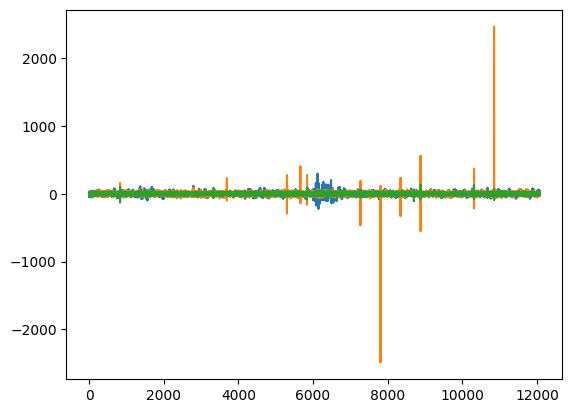

In [7]:
print(dataset)
trace_with_spikes_index=np.flatnonzero(dataset.metadata["trace_has_spikes"].to_numpy())
print(f"{len(trace_with_spikes_index)} spikes")
plt.plot(dataset.get_sample(trace_with_spikes_index[200])[0].T)

In [4]:
lp_data=dataset.filter(dataset["source_type"]=="lp",inplace=False)
rg_data=dataset.filter(dataset["source_type"]!="lp",inplace=False)

In [5]:
n_lp=len(lp_data)
n_rg=len(rg_data)
print(n_lp)
print(n_rg)

52588
52588


In [188]:
data_path="/home/zhongyiyuan/DATA/my_datasets_seisbench2/alaska1"
dataset=sbd.WaveformDataset(
        Path(data_path),
        sampling_rate=100,
        component_order="ZNE",
        dimension_order="NCW",
        cache="full",
    )

In [189]:
lp_data=dataset.filter(dataset["source_type"]=="lp",inplace=False)
rg_data=dataset.filter(dataset["source_type"]!="lp",inplace=False)
n_lp=len(lp_data)
n_rg=len(rg_data)
print(n_lp)
print(n_rg)

55917
55917


In [141]:
waveforms,metadata=rg_data.get_sample(0)

In [145]:
metadata_rg=pd.read_csv("/home/zhongyiyuan/DATA/my_datasets_seisbench2/alaska_full/metadata_rg.csv")

In [147]:
labels=list(metadata_rg.columns)

In [ ]:
metadata[trace_original_name]

In [148]:
{k: metadata[k] for k in labels}

{'source_id': 'alk61728463',
 'source_origin_time': '1997-09-15T03:29:52.400000Z',
 'source_latitude_deg': 58.2475,
 'source_longitude_deg': -155.16216666666668,
 'source_depth_km': 3.32,
 'source_magnitude': 0.7,
 'source_magnitude_type': 'ml',
 'source_type': 'le',
 'station_network_code': 'AV',
 'station_code': 'ACH',
 'station_location_code': '--',
 'trace_channel': 'EH',
 'station_latitude_deg': 58.21,
 'station_longitude_deg': -155.3281,
 'station_elevation_m': 960.0,
 'station_epicentral_distance_m': 10606.4915962507,
 'path_azimuth_deg': 246.8795428357694,
 'path_back_azimuth_deg': 66.7384734154555,
 'trace_p_arrival_time': '1997-09-15T03:29:54.643333Z',
 'trace_s_arrival_time': '1997-09-15T03:29:56.313333Z',
 'trace_p_min_weight': 0.83,
 'trace_s_min_weight': 1.1,
 'trace_p_first_motion': nan,
 'trace_name': 'bucket0$0,:3,:12167',
 'trace_sampling_rate_hz': 100.0,
 'trace_has_spikes': False,
 'trace_start_time': '1997-09-15T03:28:54.644000Z',
 'trace_p_arrival_sample': 5999.0,

In [123]:
waveforms=lp_data.get_waveforms(0)

In [174]:
rg_data.metadata

,index,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,...,trace_p_arrival_sample,trace_p_status,trace_s_arrival_sample,trace_s_status,trace_frequency_index,split,trace_name_original,source_frequency_index,trace_chunk,trace_component_order
55917,0,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,...,5999,NaN,6166,NaN,0.432474,train,alk61728463_AV.ACH..EH.mseed,0.327137,_rg,ZNE
55918,1,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,...,5999,NaN,6086,NaN,0.392309,train,alk61728463_AV.KBM..EH.mseed,0.327137,_rg,ZNE
55919,2,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,...,5999,NaN,6131,NaN,0.156627,train,alk61728463_AV.KCG..EH.mseed,0.327137,_rg,ZNE
55920,3,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,...,5999,NaN,6157,NaN,0.512427,train,alk61728483_AV.ACH..EH.mseed,0.305484,_rg,ZNE
55921,4,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,...,5999,NaN,6085,NaN,0.288493,test,alk61728483_AV.KBM..EH.mseed,0.305484,_rg,ZNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422291,366374,alk61445611,2017-04-12T12:33:01.350000Z,59.359500,-153.434500,-0.09,-0.38,ml,le,AV,...,6000,NaN,6044,NaN,0.062944,train,alk61445611_AV.AUQ..BH.mseed,-0.014864,_rg,ZNE
422292,366375,alk70753984,2017-06-27T22:49:34.720000Z,53.842667,-166.832833,5.74,-0.31,ml,le,AV,...,6000,NaN,6134,NaN,-0.434059,train,alk70753984_AV.MAPS..BH.mseed,-0.359641,_rg,ZNE
422293,366376,alk70757279,2017-08-02T03:13:32.860000Z,54.133167,-165.945167,2.98,-0.37,ml,le,AV,...,6000,NaN,6140,NaN,-0.448945,train,alk70757279_AV.AKMO..BH.mseed,-0.368481,_rg,ZNE
422294,366377,alk61555336,2017-08-26T00:14:34.300000Z,61.419667,-152.290333,4.15,0.81,ml,le,AV,...,6000,NaN,6280,NaN,0.336399,train,alk61555336_AV.CGL..EH.mseed,0.200818,_rg,ZNE


In [121]:
type(metadata)

dict

In [118]:
list(dataset.dimension_order).index("N")

0

In [175]:
subset_idxs = np.sort(
        np.random.default_rng(seed=100).choice(
            n_rg, size=n_lp, replace=False
        )
)

In [177]:
select_mask=np.zeros(len(rg_data),dtype=bool)
select_mask[subset_idxs]=True
print(sum(select_mask))

55917


In [187]:
subset_idxs

array([     1,      3,      7, ..., 366313, 366341, 366373])

In [181]:
catalog_table = pd.read_csv("/home/zhongyiyuan/DATA/my_data/Alaska0/mseed_log/downloads.csv")
rg_table = catalog_table[catalog_table["source_type"] != "lp"].copy()

In [186]:
rg_table.iloc[subset_idxs]

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_s_min_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,trace_name,trace_sampling_rate_hz
1,alk61728463,1997-09-15T03:29:52.400000Z,58.247500,-155.162167,3.32,0.70,ml,le,AV,KBM,...,0.83,D,58.274670,-155.20517,687.0,3940.899433,320.184846,140.148274,alk61728463_AV.KBM..EH.mseed,100
3,alk61728483,1997-09-15T16:56:35.910000Z,58.247000,-155.159000,2.77,0.70,ml,le,AV,ACH,...,1.06,NaN,58.210000,-155.32810,960.0,10756.369450,247.544011,67.400250,alk61728483_AV.ACH..EH.mseed,100
7,alk61728518,1997-09-16T10:12:30.740000Z,58.243833,-155.166500,3.31,0.80,ml,le,AV,KBM,...,1.11,D,58.274670,-155.20517,687.0,4117.073372,326.553949,146.521063,alk61728518_AV.KBM..EH.mseed,100
8,alk61728518,1997-09-16T10:12:30.740000Z,58.243833,-155.166500,3.31,0.80,ml,le,AV,KCG,...,1.11,NaN,58.306900,-155.11350,762.0,7682.165711,23.857728,203.902809,alk61728518_AV.KCG..EH.mseed,100
15,alk61728538,1997-09-16T20:14:15.980000Z,58.245833,-155.217167,-2.03,1.80,ml,le,AV,ANCK,...,0.84,U,58.198743,-155.49550,865.0,17176.886343,252.339019,72.102408,alk61728538_AV.ANCK..EH.mseed,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422192,alk65066207,2017-12-31T22:19:25.390000Z,60.647667,-152.687500,5.73,0.23,ml,le,AV,RSO,...,0.00,U,60.461600,-152.75600,1921.0,21069.726698,190.304477,10.244825,alk65066207_AV.RSO..EH.mseed,100
422210,alk61492393,2003-10-18T00:58:21.350000Z,58.312667,-154.831667,0.60,0.50,ml,le,AV,KCG,...,0.90,NaN,58.306900,-155.11350,762.0,16533.906110,267.893526,87.653713,alk61492393_AV.KCG..EH.mseed,100
422222,alk61109668,2005-08-26T03:33:03.540000Z,59.365833,-153.427000,-1.15,-0.80,ml,le,AV,AUR,...,1.04,NaN,59.362100,-153.43350,1225.0,556.421423,221.632609,41.627017,alk61109668_AV.AUR..EH.mseed,100
422253,alk60307673,2009-02-08T02:53:13.020000Z,60.493167,-152.758500,0.79,0.60,ml,le,AV,RDN,...,1.10,NaN,60.522400,-152.74010,1400.0,3410.481678,17.234883,197.250898,alk60307673_AV.RDN..EH.mseed,100


In [168]:
select_mask

array([False,  True, False, ..., False, False, False])

In [179]:
subset_idxs

55917

In [170]:
len(rg_data)

366379

In [180]:
metadata_rg=pd.read_csv("/home/zhongyiyuan/DATA/my_datasets_seisbench2/alaska_full/metadata_rg.csv")

In [ ]:
dataset

In [102]:
meta_rg_dict=metadata_rg.to_dict("records")

In [103]:
meta_rg_dict[0]

{'source_id': 'alk61728463',
 'source_origin_time': '1997-09-15T03:29:52.400000Z',
 'source_latitude_deg': 58.2475,
 'source_longitude_deg': -155.16216666666668,
 'source_depth_km': 3.32,
 'source_magnitude': 0.7,
 'source_magnitude_type': 'ml',
 'source_type': 'le',
 'station_network_code': 'AV',
 'station_code': 'ACH',
 'station_location_code': '--',
 'trace_channel': 'EH',
 'station_latitude_deg': 58.21,
 'station_longitude_deg': -155.3281,
 'station_elevation_m': 960.0,
 'station_epicentral_distance_m': 10606.4915962507,
 'path_azimuth_deg': 246.8795428357694,
 'path_back_azimuth_deg': 66.7384734154555,
 'trace_p_arrival_time': '1997-09-15T03:29:54.643333Z',
 'trace_s_arrival_time': '1997-09-15T03:29:56.313333Z',
 'trace_p_min_weight': 0.83,
 'trace_s_min_weight': 1.1,
 'trace_p_first_motion': nan,
 'trace_name': 'bucket0$0,:3,:12167',
 'trace_sampling_rate_hz': 100,
 'trace_has_spikes': False,
 'trace_start_time': '1997-09-15T03:28:54.644000Z',
 'trace_p_arrival_sample': 5999,
 't

In [155]:
alsk = volpick.data.AlaskaDataset()
catalog_table = pd.read_csv(alsk.save_dir / "mseed_log" / "downloads.csv")
lp_table = catalog_table[catalog_table["source_type"] == "lp"]
rg_table = catalog_table[catalog_table["source_type"] != "lp"]

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/Alaska
Create /home/zhongyiyuan/DATA/my_data/Alaska


FileNotFoundError: [Errno 2] No such file or directory: '/home/zhongyiyuan/DATA/my_data/Alaska/mseed_log/downloads.csv'

# Test clients

In [20]:
from obspy.clients.fdsn import Client
from obspy.clients.fdsn import RoutingClient

In [87]:
client1=Client("NCEDC")
inv1=client1.get_stations()

In [74]:
client2=Client("IRIS")
inv2=client2.get_stations(includerestricted=False)

In [70]:
client=Client("USGS")
# inv3=client.get_stations()

In [64]:
set1={x.code for x in inv1._networks}
set2={x.code for x in inv2._networks}

In [67]:
set1.intersection(set2)

{'3B',
 '5B',
 'AZ',
 'BK',
 'CC',
 'CI',
 'GM',
 'GS',
 'LB',
 'NC',
 'NN',
 'NP',
 'PB',
 'RE',
 'SB',
 'SF',
 'TA',
 'UO',
 'US',
 'UW'}

In [50]:
client = RoutingClient("iris-federator")

In [76]:
client1.get_waveforms(network="NC",station="MMT",location="--",channel="EH*",starttime=UTCDateTime("2004-03-27T21:27:24.830000Z")+5,endtime=UTCDateTime("2004-03-27T21:27:24.830000Z")+65)

1 Trace(s) in Stream:
NC.MMT..EHZ | 2004-03-27T21:27:29.830000Z - 2004-03-27T21:28:29.820000Z | 100.0 Hz, 6000 samples

In [47]:
client

In [77]:
client1.get_waveforms(network="AV",station="AKBB",location="--",channel="BH*",starttime=UTCDateTime("2014-05-18T07:27:17.140000Z")-30,endtime=UTCDateTime("2014-05-18T07:27:20.900000Z")+30)

FDSNNoDataException: No data available for request.
HTTP Status code: 204
Detailed response of server:



# Pandas feature testing: removing duplicates

In [282]:
speeds = pd.DataFrame(
    [
        ("falcon", "bird", "Falconiformes", 389.0),
        ("parrot", "bird", "Psittaciformes", 24.0),
        ("lion", "mammal", "Carnivora", 80.2),
        ("monkey", "mammal", "Primates", np.nan),
        ("leopard", "mammal", "Carnivora", 58),
    ],
    columns=("animal", "class", "order", "max_speed"),
)
speeds

,animal,class,order,max_speed
0,falcon,bird,Falconiformes,389.0
1,parrot,bird,Psittaciformes,24.0
2,lion,mammal,Carnivora,80.2
3,monkey,mammal,Primates,NaN
4,leopard,mammal,Carnivora,58.0


In [192]:
speeds.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   animal     5 non-null      object 
 1   class      5 non-null      object 
 2   order      5 non-null      object 
 3   max_speed  4 non-null      float64
dtypes: float64(1), object(3)
memory usage: 1.1 KB


In [283]:
speeds.duplicated(subset=["class"],keep=False)

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [193]:
speeds

,animal,class,order,max_speed
0,falcon,bird,Falconiformes,389.0
1,parrot,bird,Psittaciformes,24.0
2,lion,mammal,Carnivora,80.2
3,monkey,mammal,Primates,NaN
4,leopard,mammal,Carnivora,58.0


In [194]:
s2=speeds.loc[~speeds["order"].isin(["Carnivora","Psittaciformes"])]

In [195]:
speeds

,animal,class,order,max_speed
0,falcon,bird,Falconiformes,389.0
1,parrot,bird,Psittaciformes,24.0
2,lion,mammal,Carnivora,80.2
3,monkey,mammal,Primates,NaN
4,leopard,mammal,Carnivora,58.0


In [115]:
s2["class"].iloc[0]="x"

/tmp/ipykernel_2648440/3316586996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2["class"].iloc[0]="x"


In [196]:
s2.drop(labels=["animal"],axis=1,inplace=True)

/tmp/ipykernel_368784/2160856152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s2.drop(labels=["animal"],axis=1,inplace=True)


In [197]:
s2.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 3
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   class      2 non-null      object 
 1   order      2 non-null      object 
 2   max_speed  1 non-null      float64
dtypes: float64(1), object(2)
memory usage: 291.0 bytes


In [198]:
s2

,class,order,max_speed
0,bird,Falconiformes,389.0
3,mammal,Primates,NaN


In [199]:
speeds

,animal,class,order,max_speed
0,falcon,bird,Falconiformes,389.0
1,parrot,bird,Psittaciformes,24.0
2,lion,mammal,Carnivora,80.2
3,monkey,mammal,Primates,NaN
4,leopard,mammal,Carnivora,58.0


In [93]:
print(id(speeds))
print(id(s2))

140657545636112
140657545635296


In [6]:
speeds

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [8]:
speeds.to_csv("test.csv",index=False)

In [200]:
speeds.drop_duplicates(subset="class",keep="first",inplace=False)

,animal,class,order,max_speed
0,falcon,bird,Falconiformes,389.0
2,lion,mammal,Carnivora,80.2


In [201]:
speeds

,animal,class,order,max_speed
0,falcon,bird,Falconiformes,389.0
1,parrot,bird,Psittaciformes,24.0
2,lion,mammal,Carnivora,80.2
3,monkey,mammal,Primates,NaN
4,leopard,mammal,Carnivora,58.0


In [3]:
from obspy import read

# For debugging

In [57]:
row=download_table[download_table["trace_name"]=="alk60320961_AV.CP2..EH.mseed"].iloc[0]

In [58]:
row

source_id                                         alk60320961
source_origin_time                2012-05-25T16:45:24.570000Z
source_latitude_deg                                   61.1405
source_longitude_deg                              -152.361833
source_depth_km                                          6.11
source_magnitude                                         0.75
source_magnitude_type                                      ml
source_type                                                le
station_network_code                                       AV
station_code                                              CP2
station_location_code                                      --
trace_channel                                              EH
trace_p_arrival_time              2012-05-25T16:45:27.710000Z
trace_s_arrival_time              2012-05-25T16:45:29.990000Z
trace_p_min_weight                                       1.11
trace_s_min_weight                                       0.83
trace_p_

In [59]:
row.source_id

'alk60320961'

In [60]:
namedtuple("x", row.index)(*row)

x(source_id='alk60320961', source_origin_time='2012-05-25T16:45:24.570000Z', source_latitude_deg=61.1405, source_longitude_deg=-152.36183333333332, source_depth_km=6.11, source_magnitude=0.75, source_magnitude_type='ml', source_type='le', station_network_code='AV', station_code='CP2', station_location_code='--', trace_channel='EH', trace_p_arrival_time='2012-05-25T16:45:27.710000Z', trace_s_arrival_time='2012-05-25T16:45:29.990000Z', trace_p_min_weight=1.11, trace_s_min_weight=0.83, trace_p_first_motion='U', station_latitude_deg=61.2636, station_longitude_deg=-152.2441, station_elevation_m=1981.0, station_epicentral_distance_m=15107.312542366291, path_azimuth_deg=24.71899533411776, path_back_azimuth_deg=204.82216793789075, trace_name='alk60320961_AV.CP2..EH.mseed', trace_sampling_rate_hz=100)

In [61]:
event_params = {
    "source_id": row.source_id,
    "source_origin_time": row.source_origin_time,
    "source_latitude_deg": row.source_latitude_deg,
    "source_longitude_deg": row.source_longitude_deg,
    "source_depth_km": row.source_depth_km,
    "source_magnitude": row.source_magnitude,
    "source_magnitude_type": row.source_magnitude_type,
    "source_type": row.source_type,
}
trace_params = {
    "station_network_code": row.station_network_code,
    "station_code": row.station_code,
    "station_location_code": row.station_location_code,
    "trace_channel": row.trace_channel,
    "station_latitude_deg": row.station_latitude_deg,
    "station_longitude_deg": row.station_longitude_deg,
    "station_elevation_m": row.station_elevation_m,
    "station_epicentral_distance_m": row.station_epicentral_distance_m,
    "path_azimuth_deg": row.path_azimuth_deg,
    "path_back_azimuth_deg": row.path_back_azimuth_deg,
    "trace_p_arrival_time": row.trace_p_arrival_time,
    "trace_s_arrival_time": row.trace_s_arrival_time,
    "trace_p_min_weight": row.trace_p_min_weight,
    "trace_s_min_weight": row.trace_s_min_weight,
    "trace_p_first_motion": row.trace_p_first_motion,
    "trace_name": row.trace_name,
}

In [62]:
trace_params

{'station_network_code': 'AV',
 'station_code': 'CP2',
 'station_location_code': '--',
 'trace_channel': 'EH',
 'station_latitude_deg': 61.2636,
 'station_longitude_deg': -152.2441,
 'station_elevation_m': 1981.0,
 'station_epicentral_distance_m': 15107.312542366291,
 'path_azimuth_deg': 24.71899533411776,
 'path_back_azimuth_deg': 204.82216793789075,
 'trace_p_arrival_time': '2012-05-25T16:45:27.710000Z',
 'trace_s_arrival_time': '2012-05-25T16:45:29.990000Z',
 'trace_p_min_weight': 1.11,
 'trace_s_min_weight': 0.83,
 'trace_p_first_motion': 'U',
 'trace_name': 'alk60320961_AV.CP2..EH.mseed'}

In [47]:
client=Client("IRIS")
stt=UTCDateTime("2017-11-16T23:11:06.200000Z")-120
edt=UTCDateTime("2017-11-16T23:11:06.200000Z")+120
st=client.get_waveforms(starttime=stt,endtime=edt,network="AV",station="MNAT",location="--",channel="*")
st.detrend("demean")
st

4 Trace(s) in Stream:
AV.MNAT..BHE | 2017-11-16T23:09:06.200000Z - 2017-11-16T23:13:06.200000Z | 50.0 Hz, 12001 samples
AV.MNAT..BHN | 2017-11-16T23:09:06.200000Z - 2017-11-16T23:13:06.200000Z | 50.0 Hz, 12001 samples
AV.MNAT..BHZ | 2017-11-16T23:09:06.200000Z - 2017-11-16T23:13:06.200000Z | 50.0 Hz, 12001 samples
AV.MNAT..EHZ | 2017-11-16T23:09:06.200000Z - 2017-11-16T23:13:06.200000Z | 100.0 Hz, 24001 samples

In [64]:
st[0].stats.sampling_rate==st[1].stats.sampling_rate
print(st[0].stats.sampling_rate)
print(st[1].stats.sampling_rate)

NameError: name 'st' is not defined

In [22]:
st.plot();

Exception: All traces with the same id need to have the same sampling rate.

In [65]:
waveforms=read("/home/zhongyiyuan/DATA/my_data/Alaska/mseed/alk60320961_AV.CP2..EH.mseed")
# alk60547798_AV.GANE..EH.mseed

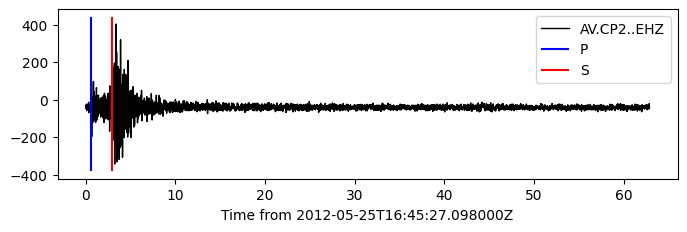

In [125]:
alsk.plot_waveforms([303361])

In [118]:
if not pd.isna(trace_params["trace_p_arrival_time"]):
    p_time = UTCDateTime(trace_params["trace_p_arrival_time"])
if not pd.isna(trace_params["trace_s_arrival_time"]):
    s_time = UTCDateTime(trace_params["trace_s_arrival_time"])

In [116]:
arrs = [xx for xx in [p_time, s_time] if xx is not None]
check_phases_out_of_traces = [[] for _ in range(len(arrs))]
for component in "ZNE":
    c_stream = waveforms.select(channel=f"*{component}")
    for arr_i, pha_arr_t in enumerate(arrs):
        for trace in c_stream:
            check_phases_out_of_traces[arr_i].append(
                pha_arr_t < trace.stats.starttime
                or pha_arr_t > trace.stats.endtime
            )

In [117]:
check_phases_out_of_traces

[[False], [False]]

In [114]:
check_phases_out_of_traces=[np.all(x) for x in check_phases_out_of_traces]
check_phases_out_of_traces

[False, False]

In [75]:
np.any(check_phases_out_of_traces)

False

In [76]:
waveforms

1 Trace(s) in Stream:
AV.CP2..EHZ | 2012-05-25T16:45:27.098000Z - 2012-05-25T16:46:29.988000Z | 100.0 Hz, 6290 samples

In [77]:
sampling_rate = 100  # waveforms[0].stats.sampling_rate


In [78]:
# This function is from seisbench.util.trace_ops. The only change is
# c_stream = stream.select(channel=f"??{c}") --> c_stream = stream.select(channel=f"*{c}")
def stream_to_array(stream, component_order):
    """
    Converts stream of single station waveforms into a numpy array according to a given component order.
    If trace start and end times disagree between component traces, remaining parts are filled with zeros.
    Also returns completeness, i.e., the fraction of samples in the output that actually contain data.
    Assumes all traces to have the same sampling rate.

    :param stream: Stream to convert
    :type stream: obspy.Stream
    :param component_order: Component order
    :type component_order: str
    :return: starttime, data, completeness
    :rtype: UTCDateTime, np.ndarray, float
    """
    starttime = min(trace.stats.starttime for trace in stream)
    endtime = max(trace.stats.endtime for trace in stream)
    sampling_rate = stream[0].stats.sampling_rate

    samples = int((endtime - starttime) * sampling_rate) + 1

    completeness = 0.0
    data = np.zeros((len(component_order), samples), dtype="float64")
    for c_idx, c in enumerate(component_order):
        c_stream = stream.select(channel=f"*{c}")
        if len(c_stream) > 1:
            # If multiple traces are found, issue a warning and write them into the data ordered by their length
            volpick.logger.warning(
                f"Found multiple traces for {c_stream[0].id} starting at {stream[0].stats.starttime}. "
                f"Completeness will be wrong in case of overlapping traces."
            )
            c_stream = sorted(c_stream, key=lambda x: x.stats.npts)

        c_completeness = 0.0
        for trace in c_stream:
            start_sample = int((trace.stats.starttime - starttime) * sampling_rate)
            l = min(len(trace.data), samples - start_sample)
            data[c_idx, start_sample : start_sample + l] = trace.data[:l]
            c_completeness += l

        completeness += min(1.0, c_completeness / samples)

    data -= np.mean(data, axis=1, keepdims=True)

    completeness /= len(component_order)
    return starttime, data, completeness

In [79]:

if any(trace.stats.sampling_rate != sampling_rate for trace in waveforms):
    volpick.logger.warning(
        f"""Found inconsistent sampling rates for """
        f"""{waveforms[0].id[:-1]} in event""" 
        f"""Resampling traces to common sampling rate."""
    )
    waveforms.resample(sampling_rate)

waveforms.detrend("demean")
actual_t_start, data, completeness = stream_to_array(
    waveforms,
    "ZNE",
)

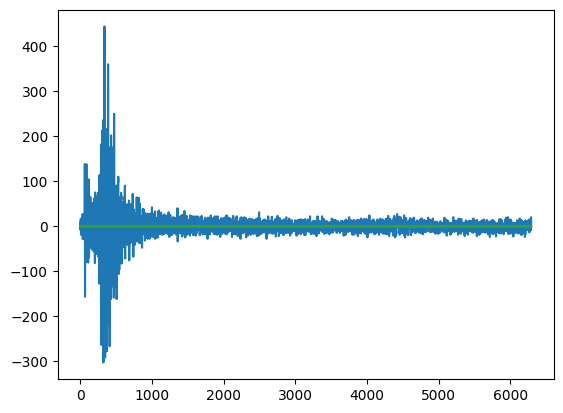

In [80]:
for tr in data:
    plt.plot(tr)

In [16]:
row.trace_p_arrival_time

'2007-07-24T23:20:02.330000Z'

In [81]:

trace_params["trace_start_time"] = str(actual_t_start)
arrival_times = {
    "p": row.trace_p_arrival_time,
    "s": row.trace_s_arrival_time,
}
for phase_hint, phase_arrival_time in arrival_times.items():
    if not pd.isna(phase_arrival_time):
        sample = (
            UTCDateTime(phase_arrival_time) - actual_t_start
        ) * sampling_rate
        trace_params[f"trace_{phase_hint}_arrival_sample"] = int(sample)
        trace_params[f"trace_{phase_hint}_status"] = "None"
    else:
        trace_params[f"trace_{phase_hint}_arrival_sample"] = None
        trace_params[f"trace_{phase_hint}_status"] = None

In [82]:
trace_params[f"trace_p_arrival_sample"]

61

In [83]:
trace_params[f"trace_s_arrival_sample"]

289

In [84]:
actual_t_start

2012-05-25T16:45:27.098000Z

In [85]:
arrival_times

{'p': '2012-05-25T16:45:27.710000Z', 's': '2012-05-25T16:45:29.990000Z'}

In [87]:
len(data[0])

6290

In [89]:
# add frequency index
win_before = 1 * sampling_rate
win_after = 6 * sampling_rate
component_FIs = []
if trace_params["trace_p_arrival_sample"]:
    ref_sample = trace_params["trace_p_arrival_sample"]
elif trace_params["trace_s_arrival_sample"]:
    ref_sample = trace_params["trace_s_arrival_sample"]
else:
    ref_sample = None

In [99]:
x=np.arange(100)

In [106]:
min(1000, len(x))

100

In [107]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [110]:
x[]

IndexError: index 100 is out of bounds for axis 0 with size 100

In [109]:
x[10:100]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])

In [112]:
for idx,a_component in enumerate(data):
    if np.sum(np.abs(np.diff(a_component))) > 1e-9:
        print(idx,len(a_component))
        print(ref_sample-win_before)
        print(ref_sample+win_after)
        print(len(a_component[max(ref_sample - win_before,0) : min(ref_sample + win_after, len(a_component))]))
        fi = freqency_index(
                data=a_component[
                    max(ref_sample - win_before,0) : min(ref_sample + win_after, len(a_component))
                ],
                dt=1.0 / sampling_rate,
                low_freq_band=[1, 5],
                high_freq_band=[10, 15],
            )

0 6290
-39
661
661


In [113]:
fi

0.20404664541122938

In [21]:
ref_sample-win_before

5899

In [22]:
ref_sample+win_after

6599

In [27]:
data[0][ref_sample - win_before : ref_sample + win_after]

array([], dtype=float64)

In [29]:
data.shape

(3, 5775)

In [30]:
ref


NameError: name 'ref' is not defined

In [ ]:
if ref_sample:
    for a_component in data:
        if np.sum(np.abs(np.diff(a_component))) > 1e-9:
            fi = freqency_index(
                    data=a_component[
                        ref_sample - win_before : ref_sample + win_after
                    ],
                    dt=1.0 / sampling_rate,
                    low_freq_band=[1, 5],
                    high_freq_band=[10, 15],
                )

            if not np.isnan(fi):
                component_FIs.append(fi)
if len(component_FIs) > 0:
    trace_FI = np.mean(component_FIs)
trace_params["trace_frequency_index"] = trace_FI
